In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import io
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)

# Neighbourhood Census Data

In [33]:
neighbourhood_census = pd.read_csv('raw_data/NYC_neighborhood_census_data_2020.csv')
neighbourhood_census.head()

,Neighborhood,Born in New York State,Car-free commute (% of commuters),Disabled population,FHAVA-backed home purchase loans (% of home purchase loans),Foreign-born population,Higher-cost home purchase loans (% of home purchase loans),Higher-cost refinance loans (% of refinance loans),"Home purchase loan rate (per 1,000 properties)",Home purchase loans in LMI tracts (% of home purchase loans),Home purchase loans to LMI borrowers (% of home purchase loans),Homeownership rate,Households with children under 18 years old,"Housing choice vouchers (% of occupied, privately owned rental units)",Housing units,Income diversity ratio,"Index of housing price appreciation, 1 family building","Index of housing price appreciation, 2-4 family building","Index of housing price appreciation, 5+ family building","Index of housing price appreciation, all property types","Index of housing price appreciation, condominium",Labor force participation rate,Mean travel time to work (minutes),Median household income (2018$),"Median household income, homeowners (2018$)","Median household income, renters (2018$)","Median rent, 2- and 3-bedrooms (2018$)","Median rent, all (2018$)","Median rent, asking","Median rent, recent movers (2018$)","Median rent, studios and 1-bedrooms (2018$)","Median sales price per unit, 1 family building (2018$)","Median sales price per unit, 2-4 family building (2018$)","Median sales price per unit, 5+ family building (2018$)","Median sales price per unit, condominium (2018$)",Moderately rent-burdened households,"Moderately rent-burdened households, low income","Moderately rent-burdened households, moderate income","Notices of foreclosure rate (per 1,000 1-4 family and condo properties)","Notices of foreclosure, all residential properties","Notices of foreclosure, initial, 1-4 family and condo properties","Notices of foreclosure, repeat, 1-4 family and condo properties",Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Poverty rate, population aged 65+","Poverty rate, population under 18 years old","Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)","Pre-foreclosure notices, 1-4 family and condo properties",Private eviction filings,Private eviction filings per 1000 private rental units,"Properties entering REO, 1-4 family",Public housing (% of rental units),Racial diversity index,"Refinance loan rate (per 1,000 properties)",Rental units affordable at 30% AMI (% of recently available units),Rental units affordable at 80% AMI (% of recently available units),Rental units affordable at 120% AMI (% of recently available units),Rental vacancy rate,Residential units within 12 mile of a subway station,Residential units within 14 mile of a park,"Sales volume, 1 family building","Sales volume, 2-4 family building","Sales volume, 5+ family building","Sales volume, all property types","Sales volume, condominium","Serious crime rate (per 1,000 residents)","Serious crime rate, property (per 1,000 residents)","Serious crime rate, violent (per 1,000 residents)","Serious housing code violations (per 1,000 privately owned rental units)",Severe crowding rate (% of renter households),Severely rent-burdened households,"Severely rent-burdened households, low income","Severely rent-burdened households, moderate income",Single-person households,"Students performing at grade level in English language arts, 4th grade","Students performing at grade level in math, 4th grade","Total housing code violations (per 1,000 privately owned rental units)",Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy
0,Greenpoint/Williamsburg,46.7,84.4,6.8,0.0,24.9,0.0,1.7,27.7,1.0,15.7,15.8,19.5,8.2,69834,7.7,583.0,648.8,718.5,455.4,NaN,71.4,34.6,78070,83030,77200,1540,2000,2980,2300,1700,2420290,734840,383850,947740,26.7,26.6,35.6,5.6,109

In [34]:
# Getting out the columns in the data
print(neighbourhood_census.columns)

Index(['Neighborhood', 'Born in New York State',
       'Car-free commute (% of commuters)', 'Disabled population',
       'FHAVA-backed home purchase loans (% of home purchase loans)',
       'Foreign-born population',
       'Higher-cost home purchase loans (% of home purchase loans)',
       'Higher-cost refinance loans (% of refinance loans)',
       'Home purchase loan rate (per 1,000 properties)',
       'Home purchase loans in LMI tracts (% of home purchase loans)',
       'Home purchase loans to LMI borrowers (% of home purchase loans)',
       'Homeownership rate', 'Households with children under 18 years old',
       'Housing choice vouchers (% of occupied, privately owned rental units)',
       'Housing units', 'Income diversity ratio',
       'Index of housing price appreciation, 1 family building',
       'Index of housing price appreciation, 2-4 family building',
       'Index of housing price appreciation, 5+ family building',
       'Index of housing price appreciation,

In [35]:
# Selecting the more useful columns

neighbourhood_census_trimmed = neighbourhood_census[[
    'Neighborhood', 
    'Car-free commute (% of commuters)', 
    'Disabled population',
    'Foreign-born population',
    'Median household income (2018$)',
    'Median rent, all (2018$)',
    'Percent Asian', 
    'Percent Hispanic', 
    'Percent black', 
    'Percent white',
    'Population', 
    'Poverty rate',
    'Public housing (% of rental units)',
    'Unemployment rate',
    'Residential units within 12 mile of a subway station',
    'Population density (1,000 persons per square mile)',
    'Serious crime rate (per 1,000 residents)',
    'Severely rent-burdened households',
    'Rental vacancy rate',
    'Mean travel time to work (minutes)'
    ]]

neighbourhood_census_trimmed.head()

#'Residential units within 12 mile of a subway station'
#'Population density (1,000 persons per square mile)'
#'Serious crime rate (per 1,000 residents)'
#'Severely rent-burdened households'
# 'Rental vacancy rate',
#'Mean travel time to work (minutes)'

# find the number of stations in each neighbourhood (after the groupby)
# population/area = density --> find the area (feature engineering)


,Neighborhood,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate,Residential units within 12 mile of a subway station,"Population density (1,000 persons per square mile)","Serious crime rate (per 1,000 residents)",Severely rent-burdened households,Rental vacancy rate,Mean travel time to work (minutes)
0,Greenpoint/Williamsburg,84.4,6.8,24.9,78070,2000,7.0,21.6,3.6,64.5,152002,23.3,11.1,5.49,92.2,36.8,13.3,26.7,2.3,34.6
1,Fort Greene/Brooklyn Heights,90.9,8.7,18.8,94330,1920,9.0,14.9,25.8,47.2,135444,14.9,11.1,5.55,94.4,43.5,19.5,18.2,2.5,35.1
2,Bedford Stuyvesant,78.2,8.8,18.4,52900,1240,2.7,19.4,48.8,26.6,142027,24.4,18.8,4.73,87.7,61.8,17.5,30.2,5.4,42.0
3,Bushwick,82.2,7.0,30.3,51620,1460,5.6,53.9,17.0,21.5,140474,27.1,4.5,5.23,97.9,55.4,13.8,31.2,3.7,41.3
4,East New York/Starrett City,76.6,7.3,31.5,37490,1250,3.8,38.2,52.8,3.9,176471,24.7,16.7,8.98,71.2,29.1,17.1,32.2,5.1,42.6


## Distribution

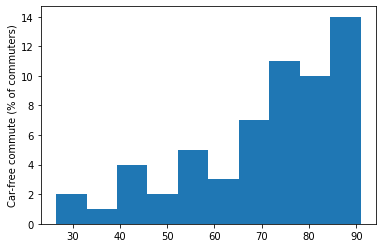

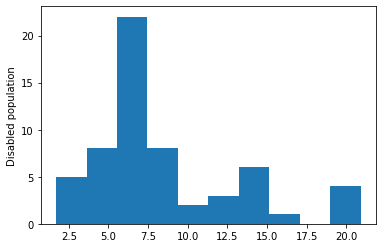

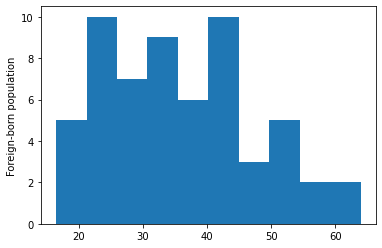

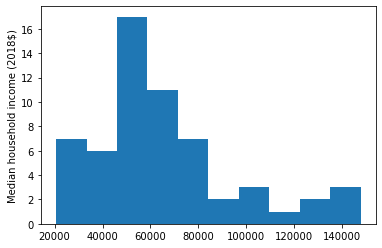

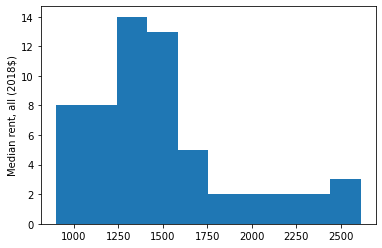

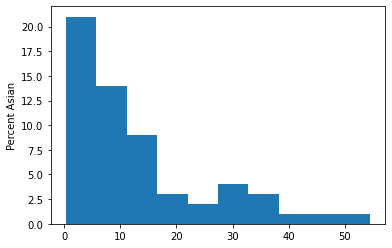

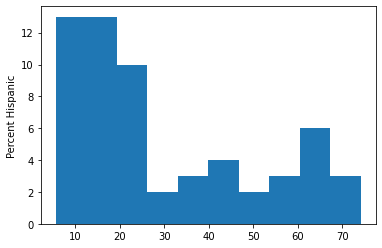

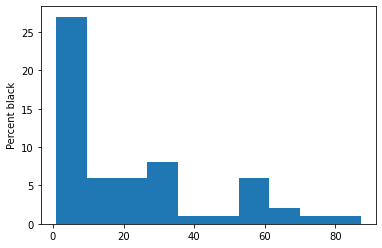

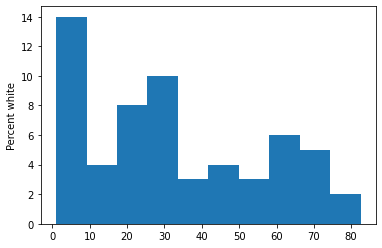

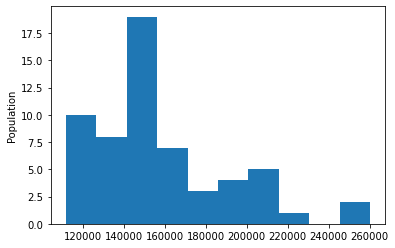

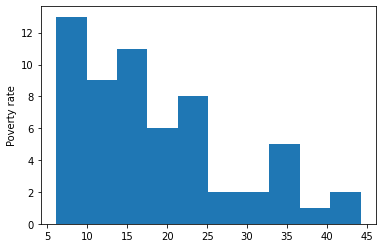

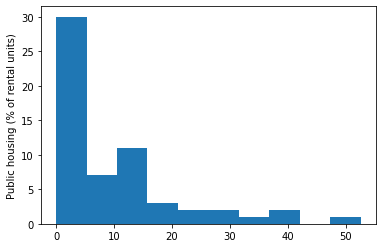

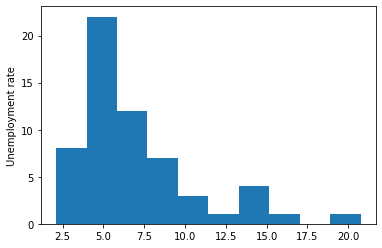

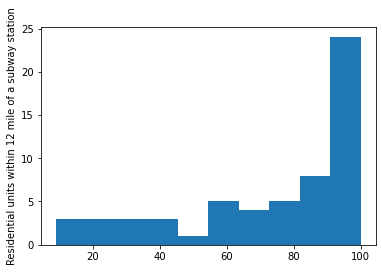

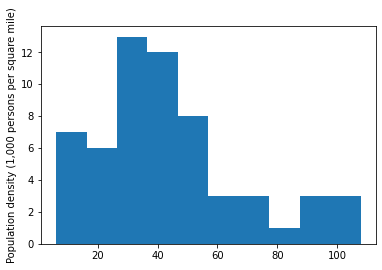

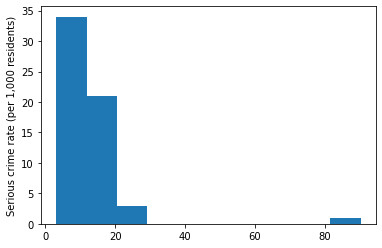

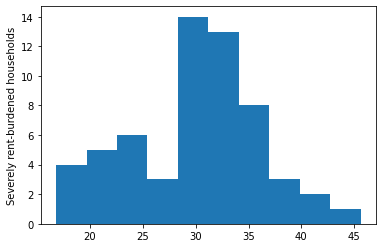

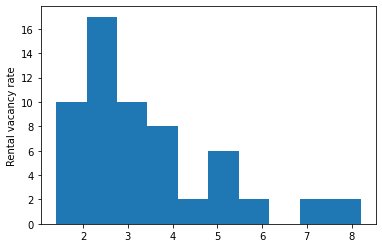

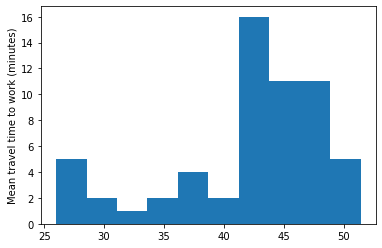

In [36]:
#remove neighbour column

no_neighbour = neighbourhood_census_trimmed.drop(['Neighborhood'], axis=1)

for i in no_neighbour.columns:
    plt.figure()
    plt.hist(no_neighbour[i])
    plt.ylabel(i)


In [37]:
percent_missing = no_neighbour.isnull().sum() * 100 / len(no_neighbour)
missing_value_df = pd.DataFrame({'column_name': no_neighbour.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
Car-free commute (% of commuters),Car-free commute (% of commuters),0.0
Poverty rate,Poverty rate,0.0
Rental vacancy rate,Rental vacancy rate,0.0
Severely rent-burdened households,Severely rent-burdened households,0.0
"Serious crime rate (per 1,000 residents)","Serious crime rate (per 1,000 residents)",0.0
"Population density (1,000 persons per square mile)","Population density (1,000 persons per square m...",0.0
Residential units within 12 mile of a subway station,Residential units within 12 mile of a subway s...,0.0
Unemployment rate,Unemployment rate,0.0
Public housing (% of rental units),Public housing (% of rental units),0.0
Population,Population,0.0


## Skew

In [38]:
# checking skewness

# -0.5 to 0.5 -> Fairly symmetrical
# -1 to -0.5 OR 0.5 to 1 -> Moderately Skewed
# <-1 OR >1 -> Highly skewed

no_neighbour.skew(axis = 0, skipna = True)


Car-free commute (% of commuters)                      -0.957211
Disabled population                                     1.262464
Foreign-born population                                 0.336341
Median household income (2018$)                         1.075778
Median rent, all (2018$)                                1.193530
Percent Asian                                           1.296106
Percent Hispanic                                        0.798206
Percent black                                           1.143741
Percent white                                           0.392187
Population                                              1.103240
Poverty rate                                            0.930836
Public housing (% of rental units)                      1.728984
Unemployment rate                                       1.606798
Residential units within 12 mile of a subway station   -0.978362
Population density (1,000 persons per square mile)      0.806179
Serious crime rate (per 1

# Subway Data

In [152]:
subway_raw = pd.read_csv('raw_data/NYC_subway_traffic_2017-2021.csv')
subway_raw.head()
subway_raw['year'] = pd.DatetimeIndex(subway_raw['Datetime']).year
subway_raw['month'] = pd.DatetimeIndex(subway_raw['Datetime']).month

subway_raw.head()



,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,year,month
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0,2017,2
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0,2017,2
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0,2017,2
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0,2017,2
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0,2017,2


## Check for missing value

In [153]:
percent_missing = subway_raw.isnull().sum() * 100 / len(subway_raw)
missing_value_df = pd.DataFrame({'column_name': subway_raw.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
North Direction Label,North Direction Label,3.198842
South Direction Label,South Direction Label,2.585992
Unique ID,Unique ID,0.000000
Borough,Borough,0.000000
year,year,0.000000
Exits,Exits,0.000000
Entries,Entries,0.000000
Longitude,Longitude,0.000000
Latitude,Latitude,0.000000
Neighborhood,Neighborhood,0.000000


## Distribution

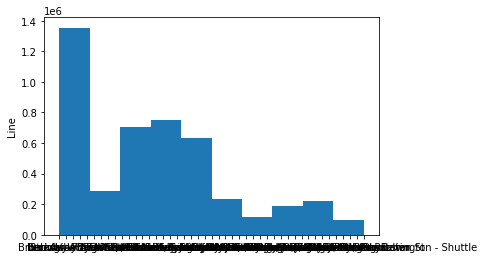

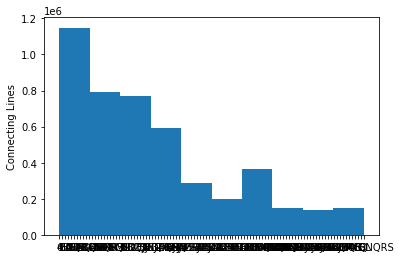

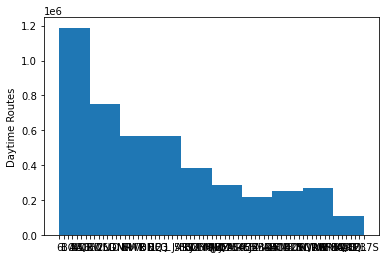

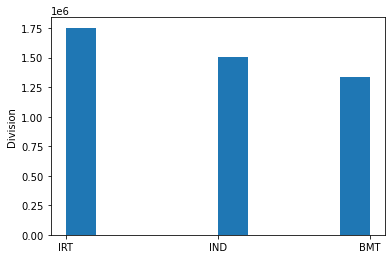

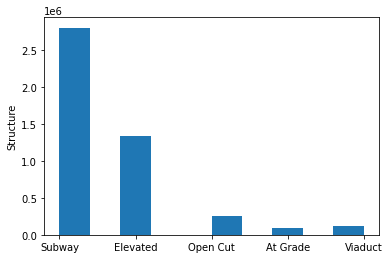

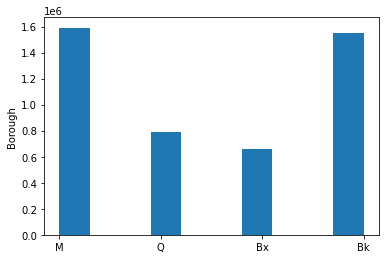

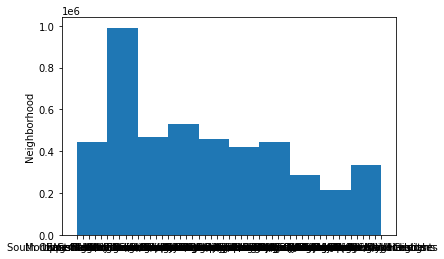

In [154]:
distribution_check = subway_raw[['Line','Connecting Lines','Daytime Routes','Division','Structure','Borough','Neighborhood']]
for i in distribution_check.columns:
    plt.figure()
    plt.hist(distribution_check[i])
    plt.ylabel(i)
    

#no check for north/south direction label

## Selecting Apr, May, June from 2020, dropping columns

In [155]:
subway_filitered = subway_raw.loc[subway_raw['year'] == 2020]
subway_filitered = subway_filitered[subway_filitered['month'].isin([3,4,5])]
subway_filitered = subway_filitered.drop(['year', 'month', 'Unique ID', 'North Direction Label',
                                          'South Direction Label','Latitude', 'Longitude','Remote Unit','Line','Daytime Routes'], axis=1)
subway_filitered.to_csv('subway_filitered.csv')
subway_filitered.head()
# subway_filitered.shape

,Datetime,Stop Name,Connecting Lines,Division,Structure,Borough,Neighborhood,Entries,Exits
3107397,2020-03-01 00:00:00,1 Av,L,BMT,Subway,M,Lower East Side/Chinatown,0.0,0.0
3107398,2020-03-01 00:00:00,103 St,6,IRT,Subway,M,East Harlem,383.0,788.0
3107399,2020-03-01 00:00:00,103 St,1,IRT,Subway,M,Upper West Side,553.0,570.0
3107400,2020-03-01 00:00:00,103 St,BC,IND,Subway,M,Upper West Side,161.0,350.0
3107401,2020-03-01 00:00:00,103 St - Corona Plaza,7,IRT,Elevated,Q,Jackson Heights,400.0,1701.0


In [156]:
# combining entries and exits

subway_filitered['EntriesExits']= subway_filitered[['Entries','Exits']].sum(axis=1)

subway_filitered = subway_filitered.drop(['Entries','Exits'], axis=1)
subway_filitered.head()

,Datetime,Stop Name,Connecting Lines,Division,Structure,Borough,Neighborhood,EntriesExits
3107397,2020-03-01 00:00:00,1 Av,L,BMT,Subway,M,Lower East Side/Chinatown,0.0
3107398,2020-03-01 00:00:00,103 St,6,IRT,Subway,M,East Harlem,1171.0
3107399,2020-03-01 00:00:00,103 St,1,IRT,Subway,M,Upper West Side,1123.0
3107400,2020-03-01 00:00:00,103 St,BC,IND,Subway,M,Upper West Side,511.0
3107401,2020-03-01 00:00:00,103 St - Corona Plaza,7,IRT,Elevated,Q,Jackson Heights,2101.0


## OHE Columns

In [157]:
# one hot encoding on the lines

# stations_df = pd.read_csv('raw_data/Stations.csv')
# line_df = stations_df['Line']
# line_df = line_df.drop_duplicates()

# line_list = line_df.to_list()

# print(line_list)

            
# stations_list = ['Astoria', 'Brighton', 'Broadway', 'Manhattan Bridge', 
#                  '4th Av', 'Culver', 'West End', 
#                  'Sea Beach', 'Jamaica', 'Myrtle Av', 'Canarsie', 'Franklin Shuttle', 
#                  '8th Av', 'Concourse', '6th Av', 'Liberty Av', 
#                  'Rockaway', '63rd St', 'Queens Blvd', 'Queens', 'Crosstown', 
#                  '7Av', 'Clark St', 'Eastern Pky', 'Nostrand', 'Pelham', 'Jerome Av', 'Lexington Av', 
#                  'White Plains Rd', 'Dyre Av', 'Flushing', 'Lexington', 'Second Av', 'Staten Island',
#                  'Fulton St', 'Lenox', 'Shuttle','Archer']


# for station in stations_list:
#     name = 'Line_' + station
#     subway_filitered.loc[subway_filitered['Line'].str.contains(station), name] = 1

# subway_filitered = subway_filitered.fillna(0) 

# subway_filitered.head()



In [158]:
#OHE for Division, Structure, Borough

def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

cols = ['Division','Structure','Borough']

encoded_subway = one_hot(subway_filitered,cols)



encoded_subway.to_csv('encoded_subway.csv')

encoded_subway.head()


,Datetime,Stop Name,Connecting Lines,Division,Structure,Borough,Neighborhood,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q
3107397,2020-03-01 00:00:00,1 Av,L,BMT,Subway,M,Lower East Side/Chinatown,0.0,1,0,0,0,0,0,1,0,0,0,1,0
3107398,2020-03-01 00:00:00,103 St,6,IRT,Subway,M,East Harlem,1171.0,0,0,1,0,0,0,1,0,0,0,1,0
3107399,2020-03-01 00:00:00,103 St,1,IRT,Subway,M,Upper West Side,1123.0,0,0,1,0,0,0,1,0,0,0,1,0
3107400,2020-03-01 00:00:00,103 St,BC,IND,Subway,M,Upper West Side,511.0,0,1,0,0,0,0,1,0,0,0,1,0
3107401,2020-03-01 00:00:00,103 St - Corona Plaza,7,IRT,Elevated,Q,Jackson Heights,2101.0,0,0,1,0,1,0,0,0,0,0,0,1


In [159]:
# OHE for connecting lines and DAytime Routes

list_of_routes = ["N",'Q','R','D','W','B','F','M','A','C','E','S','J','Z','1','2','3','L','G','5','4','7','6']

#Connecting Liness
for line in list_of_routes:
    name = 'ConnectingLine_' + line
    encoded_subway.loc[encoded_subway['Connecting Lines'].str.contains(line), name] = 1

#Daytime Routes
# for line in list_of_routes:
#     name = 'DaytimeRoutes_' + line
#     encoded_subway.loc[encoded_subway['Daytime Routes'].str.contains(line), name] = 1
    
encoded_subway = encoded_subway.fillna(0) 

encoded_subway.to_csv('encoded_subway.csv')

encoded_subway.head()


,Datetime,Stop Name,Connecting Lines,Division,Structure,Borough,Neighborhood,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6
3107397,2020-03-01 00:00:00,1 Av,L,BMT,Subway,M,Lower East Side/Chinatown,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3107398,2020-03-01 00:00:00,103 St,6,IRT,Subway,M,East Harlem,1171.0,0,0,1,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3107399,2020-03-01 00:00:00,103 St,1,IRT,Subway,M,Upper West Side,1123.0,0,0,1,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3107400,2020-03-01 00:00:00,103 St,BC,IND,Subway,M,Upper West Side,511.0,0,1,0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3107401,2020-03-01 00:00:00,103 St - Corona Plaza,7,IRT,Elevated,Q,Jackson Heights,2101.0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Groupby Neighbourhood, Datetime

In [160]:
#drop extra columns and OHE columns before grouping

to_group = encoded_subway
encoded_subway = encoded_subway.drop(['Connecting Lines','Division','Structure', 'Borough','Stop Name'], axis=1)

grouped = encoded_subway.groupby(['Neighborhood','Datetime']).max().reset_index()
grouped.to_csv('grouped.csv')
grouped.head()


,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6
0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Feature engineering on num of stations 

In [161]:
# find the number of stations in each neighbourhood (after the groupby)
neighbourhood_stations = to_group.groupby(['Neighborhood']).nunique().reset_index()

neighbourhood_stations.rename(columns={'Stop Name':'num_of_stations'}, inplace=True)
neighbourhood_stations = neighbourhood_stations[['Neighborhood','num_of_stations']]
neighbourhood_stations.head()
# encoded_subway.head()

#joining the 2 df together

grouped = pd.merge(grouped, neighbourhood_stations, on="Neighborhood")
# grouped = grouped.drop(['Stop Name'])
grouped.to_csv('grouped.csv')

grouped.head()

,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,num_of_stations
0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12


In [162]:
#aggregating the entries/exit column to a binary
grouped.head()

grouped_datetime = grouped.groupby(['Datetime']).median()
grouped_datetime = grouped_datetime.iloc[:, 0]
grouped_datetime.head()
# grouped_datetime.to_csv('median.csv')

# print(grouped.head())
median_dict = grouped_datetime.to_dict()

grouped["median"] = grouped["Datetime"].map(median_dict)

grouped.loc[grouped['EntriesExits'] >= grouped['median'], 'binary_target'] = 1
grouped.loc[grouped['EntriesExits'] < grouped['median'], 'binary_target'] = 0

    

grouped.to_csv('grouped.csv')
grouped.head()

,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,num_of_stations,median,binary_target
0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1097.0,1.0
1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,529.0,0.0
2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1633.0,1.0
3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,2770.0,1.0
4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,3251.0,1.0


## Merging the Subway and neighbourhood data

In [178]:
result = pd.merge(grouped, neighbourhood_census_trimmed, on="Neighborhood").reset_index()
# result = result.groupby(['Neighborhood','Datetime']).max()
result.to_csv('final.csv')
result.head()

,index,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,num_of_stations,median,binary_target,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate,Residential units within 12 mile of a subway station,"Population density (1,000 persons per square mile)","Serious crime rate (per 1,000 residents)",Severely rent-burdened households,Rental vacancy rate,Mean travel time to work (minutes)
0,0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1097.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0
1,1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,529.0,0.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0
2,2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1633.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0
3,3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,2770.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0
4,4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,3251.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0


## Feature engineering on area size

In [179]:
# population/area = density --> find the area (feature engineering)
result["Area (in sq miles)"] = (result['Population']/1000) / result['Population density (1,000 persons per square mile)']
result.to_csv('final.csv')
result.head()

,index,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,num_of_stations,median,binary_target,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate,Residential units within 12 mile of a subway station,"Population density (1,000 persons per square mile)","Serious crime rate (per 1,000 residents)",Severely rent-burdened households,Rental vacancy rate,Mean travel time to work (minutes),Area (in sq miles)
0,0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1097.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129
1,1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,529.0,0.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129
2,2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1633.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129
3,3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,2770.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129
4,4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,3251.0,1.0,81.6,4.6,36.8,67650,1670,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129


## Binning the Percentages

Columns with percentages:
1. Car-free commute (% of commuters)
2. Percent Asian
3. Percent Hispanic
3. Percent black
4. Percent white
5. Public housing (% of rental units)

In [180]:
bins = [0,20, 40, 60, 80, 100]
result['binned_car-free_commute'] = pd.cut(result['Car-free commute (% of commuters)'], bins)
result['binned_Percent_Asian'] = pd.cut(result['Percent Asian'], bins)
result['binned_Percent_Hispanic'] = pd.cut(result['Percent Hispanic'], bins)
result['binned_Percent_black'] = pd.cut(result['Percent black'], bins)
result['binned_Percent_white'] = pd.cut(result['Percent white'], bins)
result['binned_Public_housing'] = pd.cut(result['Public housing (% of rental units)'], bins)

#drop after binning
result = result.drop(['Car-free commute (% of commuters)','Percent Asian','Percent Hispanic','Percent black','Percent white','Public housing (% of rental units)','median'], axis=1)
result.to_csv('final.csv')
result.head()

,index,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,num_of_stations,binary_target,Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Population,Poverty rate,Unemployment rate,Residential units within 12 mile of a subway station,"Population density (1,000 persons per square mile)","Serious crime rate (per 1,000 residents)",Severely rent-burdened households,Rental vacancy rate,Mean travel time to work (minutes),Area (in sq miles),binned_car-free_commute,binned_Percent_Asian,binned_Percent_Hispanic,binned_Percent_black,binned_Percent_white,binned_Public_housing
0,0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1.0,4.6,36.8,67650,1670,164321,13.0,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129,"(80, 100]","(0, 20]","(20, 40]","(0, 20]","(40, 60]","(0, 20]"
1,1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,0.0,4.6,36.8,67650,1670,164321,13.0,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129,"(80, 100]","(0, 20]","(20, 40]","(0, 20]","(40, 60]","(0, 20]"
2,2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1.0,4.6,36.8,67650,1670,164321,13.0,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129,"(80, 100]","(0, 20]","(20, 40]","(0, 20]","(40, 60]","(0, 20]"
3,3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1.0,4.6,36.8,67650,1670,164321,13.0,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129,"(80, 100]","(0, 20]","(20, 40]","(0, 20]","(40, 60]","(0, 20]"
4,4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,1.0,4.6,36.8,67650,1670,164321,13.0,4.61,72.9,31.9,8.1,23.9,2.3,42.0,5.151129,"(80, 100]","(0, 20]","(20, 40]","(0, 20]","(40, 60]","(0, 20]"
